In [2]:
from ingestion.fetch_data import fetch_karachi_aqi_weather
from preprocessing.clean_data import clean_aqi_weather_data
import pandas as pd
from datetime import datetime, timezone

end = datetime.now(timezone.utc).date()
start = end - pd.Timedelta(days=180)
df = fetch_karachi_aqi_weather(
        start_date=str(start),
        end_date=str(end)
)


df_clean = clean_aqi_weather_data(df)

print(df.isna().sum())
print(df_clean.isna().sum())
print(df_clean.head())

Air Quality Data Shape: (4344, 8)
Air Quality Data Frame Nulls:
pm10                0
pm2_5               0
carbon_monoxide     0
nitrogen_dioxide    0
sulphur_dioxide     0
ozone               0
us_aqi              0
timestamp           0
dtype: int64
Weather Data Shape: (4344, 5)
Weather Data Frame Nulls:
temperature_2m          0
relative_humidity_2m    0
wind_speed_10m          0
surface_pressure        0
timestamp               0
dtype: int64
pm10                    0
pm2_5                   0
carbon_monoxide         0
nitrogen_dioxide        0
sulphur_dioxide         0
ozone                   0
us_aqi                  0
timestamp               0
temperature_2m          0
relative_humidity_2m    0
wind_speed_10m          0
surface_pressure        0
dtype: int64
timestamp                           0
pm10                                0
pm2_5                               0
carbon_monoxide                     0
nitrogen_dioxide                    0
sulphur_dioxide                  

In [3]:
df_clean.to_csv('aqi-weather-6-months-for-eda.csv')

In [4]:
df_clean.columns

Index(['timestamp', 'pm10', 'pm2_5', 'carbon_monoxide', 'nitrogen_dioxide',
       'sulphur_dioxide', 'ozone', 'us_aqi', 'temperature_2m',
       'relative_humidity_2m', 'wind_speed_10m', 'surface_pressure',
       'temperature_2m_was_missing', 'relative_humidity_2m_was_missing',
       'wind_speed_10m_was_missing', 'surface_pressure_was_missing',
       'pm10_was_missing', 'pm2_5_was_missing', 'carbon_monoxide_was_missing',
       'nitrogen_dioxide_was_missing', 'sulphur_dioxide_was_missing',
       'ozone_was_missing', 'us_aqi_was_missing'],
      dtype='object')

In [5]:
from feature_engineering.feature_pipeline import build_feature_store_rows

df_features = build_feature_store_rows(df=df_clean)

In [6]:
df_features.head(), df_features.columns

(  location_id     event_timestamp  pm10  pm2_5  carbon_monoxide  \
 0     karachi 2025-08-30 00:00:00  88.0   38.3            435.0   
 1     karachi 2025-08-30 01:00:00  84.5   36.0            326.0   
 2     karachi 2025-08-30 02:00:00  80.1   34.2            248.0   
 3     karachi 2025-08-30 03:00:00  76.6   33.3            224.0   
 4     karachi 2025-08-30 04:00:00  77.3   33.8            231.0   
 
    nitrogen_dioxide  sulphur_dioxide  ozone  us_aqi  temperature_2m  ...  \
 0              32.5             12.0   23.0      96            26.8  ...   
 1              26.0             10.8   30.0      96            26.5  ...   
 2              21.3             10.2   34.0      97            26.3  ...   
 3              20.4             10.2   33.0      97            26.3  ...   
 4              21.3             10.7   29.0      98            26.1  ...   
 
    relative_humidity_2m_was_missing  wind_speed_10m_was_missing  \
 0                                 0                      

In [7]:
df_features.columns

Index(['location_id', 'event_timestamp', 'pm10', 'pm2_5', 'carbon_monoxide',
       'nitrogen_dioxide', 'sulphur_dioxide', 'ozone', 'us_aqi',
       'temperature_2m', 'relative_humidity_2m', 'wind_speed_10m',
       'surface_pressure', 'hour_sin', 'hour_cos', 'day_of_week', 'month',
       'aqi_lag_1', 'aqi_lag_3', 'aqi_lag_24', 'aqi_roll_6', 'aqi_roll_24',
       'pm25_wind_interaction', 'temperature_2m_was_missing',
       'relative_humidity_2m_was_missing', 'wind_speed_10m_was_missing',
       'surface_pressure_was_missing', 'pm10_was_missing', 'pm2_5_was_missing',
       'carbon_monoxide_was_missing', 'nitrogen_dioxide_was_missing',
       'sulphur_dioxide_was_missing', 'ozone_was_missing',
       'us_aqi_was_missing'],
      dtype='object')

In [8]:
df_features.isna().sum()

location_id                         0
event_timestamp                     0
pm10                                0
pm2_5                               0
carbon_monoxide                     0
nitrogen_dioxide                    0
sulphur_dioxide                     0
ozone                               0
us_aqi                              0
temperature_2m                      0
relative_humidity_2m                0
wind_speed_10m                      0
surface_pressure                    0
hour_sin                            0
hour_cos                            0
day_of_week                         0
month                               0
aqi_lag_1                           0
aqi_lag_3                           0
aqi_lag_24                          0
aqi_roll_6                          0
aqi_roll_24                         0
pm25_wind_interaction               0
temperature_2m_was_missing          0
relative_humidity_2m_was_missing    0
wind_speed_10m_was_missing          0
surface_pres

In [10]:
df_features.head()

,location_id,event_timestamp,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,us_aqi,temperature_2m,...,relative_humidity_2m_was_missing,wind_speed_10m_was_missing,surface_pressure_was_missing,pm10_was_missing,pm2_5_was_missing,carbon_monoxide_was_missing,nitrogen_dioxide_was_missing,sulphur_dioxide_was_missing,ozone_was_missing,us_aqi_was_missing
0,karachi,2025-08-30 00:00:00,88.0,38.3,435.0,32.5,12.0,23.0,96,26.8,...,0,0,0,0,0,0,0,0,0,0
1,karachi,2025-08-30 01:00:00,84.5,36.0,326.0,26.0,10.8,30.0,96,26.5,...,0,0,0,0,0,0,0,0,0,0
2,karachi,2025-08-30 02:00:00,80.1,34.2,248.0,21.3,10.2,34.0,97,26.3,...,0,0,0,0,0,0,0,0,0,0
3,karachi,2025-08-30 03:00:00,76.6,33.3,224.0,20.4,10.2,33.0,97,26.3,...,0,0,0,0,0,0,0,0,0,0
4,karachi,2025-08-30 04:00:00,77.3,33.8,231.0,21.3,10.7,29.0,98,26.1,...,0,0,0,0,0,0,0,0,0,0


Only need to run it once

In [11]:
from dotenv import load_dotenv
import os
from pymongo import MongoClient

load_dotenv()
uri = os.getenv("MONGODB_URI")
assert uri, "MONGODB_URI missing in .env"

client = MongoClient(uri, serverSelectionTimeoutMS=8000)
client.admin.command("ping")

db = client["aqi_feature_store"]
col = db["aqi_features_hourly"]

# Prevent duplicates: one row per (location_id, event_timestamp)
col.create_index([("location_id", 1), ("event_timestamp", 1)], unique=True)

# Faster range queries for training
col.create_index([("event_timestamp", 1)])

print("✅ Mongo feature store indexes ready:", col.index_information())

✅ Mongo feature store indexes ready: {'_id_': {'v': 2, 'key': [('_id', 1)]}, 'location_id_1_event_timestamp_1': {'v': 2, 'key': [('location_id', 1), ('event_timestamp', 1)], 'unique': True}, 'event_timestamp_1': {'v': 2, 'key': [('event_timestamp', 1)]}}


In [12]:
import pandas as pd
from pymongo import UpdateOne

# Ensure timestamp is UTC
df_to_push = df_features.copy()
df_to_push["event_timestamp"] = pd.to_datetime(df_to_push["event_timestamp"], utc=True)

records = df_to_push.to_dict("records")

BATCH_SIZE = 1000
total_written = 0

for i in range(0, len(records), BATCH_SIZE):
    chunk = records[i:i+BATCH_SIZE]
    ops = []
    for rec in chunk:
        filt = {"location_id": rec["location_id"], "event_timestamp": rec["event_timestamp"]}
        ops.append(UpdateOne(filt, {"$set": rec}, upsert=True))

    result = col.bulk_write(ops, ordered=False)
    total_written += int(result.upserted_count + result.modified_count)

print(f"✅ Upsert complete. Modified+upserted: {total_written:,} rows.")
print("✅ Collection count:", col.count_documents({}))

✅ Upsert complete. Modified+upserted: 4,320 rows.
✅ Collection count: 4320


In [13]:
import os
os.makedirs("data", exist_ok=True)

df_to_push.to_parquet("data/karachi_features_6mo.parquet", index=False)
print("✅ Saved snapshot to data/karachi_features_6mo.parquet")

✅ Saved snapshot to data/karachi_features_6mo.parquet


In [14]:
latest = col.find({"location_id": "karachi"}, {"_id": 0}).sort("event_timestamp", -1).limit(3)
for doc in latest:
    print(doc["location_id"], doc["event_timestamp"], doc["us_aqi"], doc["aqi_lag_1"], doc["aqi_roll_24"])

karachi 2026-02-25 23:00:00 82 83.0 88.83333333333333
karachi 2026-02-25 22:00:00 83 84.0 89.33333333333333
karachi 2026-02-25 21:00:00 84 88.0 89.79166666666667


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb



# ==============================
# 1. LOAD DATA
# ==============================

df = df_features.dropna()

print("Data shape:", df.shape)


# ==============================
# 2. TRAIN / TEST SPLIT (TIME-BASED)
# ==============================

split_idx = int(len(df) * 0.8)

train = df.iloc[:split_idx]
test = df.iloc[split_idx:]

X_train = train.drop(columns=["target_aqi", "timestamp", "us_aqi"])

y_train = train["target_aqi"]

X_test = test.drop(columns=["target_aqi", "timestamp", "us_aqi"])
y_test = test["target_aqi"]


# ==============================
# 3. TRAIN MODELS
# ==============================

models = {}

lr = LinearRegression()
lr.fit(X_train, y_train)
models["Linear"] = lr

rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=12,
    random_state=42
)
rf.fit(X_train, y_train)
models["RandomForest"] = rf

xgb_model = xgb.XGBRegressor(
    n_estimators=500,
    learning_rate=0.03,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb_model.fit(X_train, y_train)
models["XGBoost"] = xgb_model


# ==============================
# 4. EVALUATE MODELS
# ==============================

def evaluate(name, model):
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    print(f"{name} → MAE: {mae:.2f} | RMSE: {rmse:.2f} | R2: {r2:.2f}")
    return rmse


print("\nModel Performance:\n")

best_model = None
best_rmse = float("inf")

for name, model in models.items():
    rmse = evaluate(name, model)
    if rmse < best_rmse:
        best_rmse = rmse
        best_model = model

print("\nBest model selected:", type(best_model).__name__)


# ==============================
# 5. FORECAST NEXT 72 HOURS
# ==============================

def recursive_forecast(model, df, steps=24):

    df_copy = df.copy()
    predictions = []

    for _ in range(steps):

        latest = df_copy.iloc[-1:].copy()

        X_latest = latest.drop(columns=["target_aqi", "timestamp", "us_aqi"])
        next_pred = model.predict(X_latest)[0]

        predictions.append(next_pred)

        # create next timestamp
        new_row = latest.copy()
        new_row["timestamp"] = latest["timestamp"] + pd.Timedelta(hours=1)

        # update base AQI
        new_row["us_aqi"] = next_pred
        new_row["target_aqi"] = np.nan

        # update lag features manually
        new_row["aqi_lag_1"] = next_pred
        new_row["aqi_lag_3"] = latest["aqi_lag_1"].values[0]
        new_row["aqi_lag_24"] = latest["aqi_lag_3"].values[0]

        # update time features
        hour = new_row["timestamp"].dt.hour.values[0]
        new_row["hour"] = hour
        new_row["hour_sin"] = np.sin(2 * np.pi * hour / 24)
        new_row["hour_cos"] = np.cos(2 * np.pi * hour / 24)
        new_row["day_of_week"] = new_row["timestamp"].dt.dayofweek.values[0]
        new_row["month"] = new_row["timestamp"].dt.month.values[0]

        df_copy = pd.concat([df_copy, new_row], ignore_index=True)

    return predictions


future_preds = recursive_forecast(best_model, df, steps=72)


# ==============================
# 6. PLOT RESULTS
# ==============================

plt.figure(figsize=(12,6))
plt.plot(range(24), future_preds)
plt.plot(range(24), y_test.values)
plt.title("Next 3 Days AQI Forecast (Hourly)")
plt.xlabel("Hours Ahead")
plt.ylabel("Predicted AQI")
plt.show()


Data shape: (4320, 34)


KeyError: "['target_aqi', 'timestamp'] not found in axis"

In [ ]:
X_train.shape, X_test.shape,y_test.shape

((3436, 26), (859, 26), (859,))

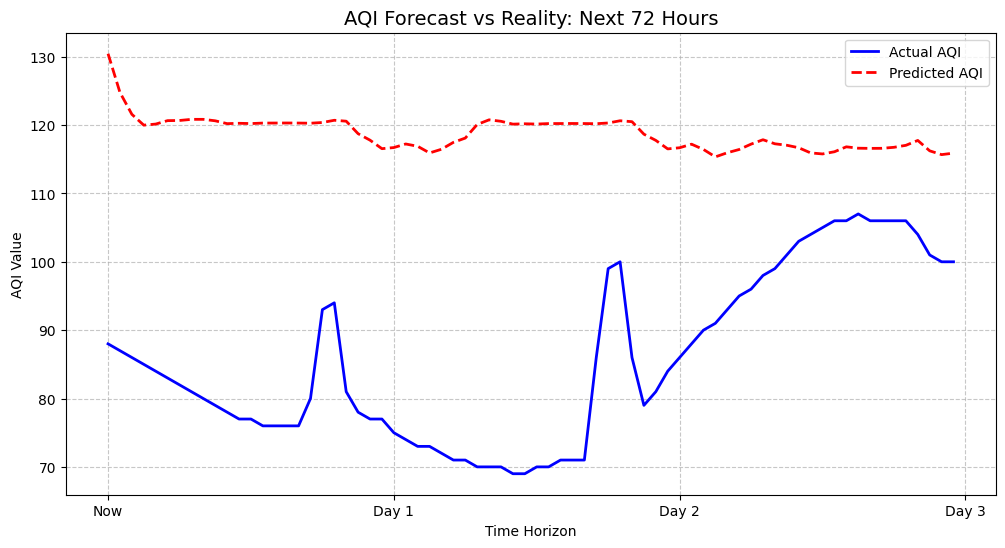

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# 1. Add Labels and a Legend (Crucial!)
plt.plot(range(72), y_test.values[:72], label='Actual AQI', color='blue', linewidth=2)
plt.plot(range(72), future_preds[:72], label='Predicted AQI', color='red', linestyle='--', linewidth=2)

# 2. Add a Grid for easier reading
plt.grid(True, linestyle='--', alpha=0.7)

# 3. Mark the Days (Every 24 hours)
plt.xticks(range(0, 73, 24), ['Now', 'Day 1', 'Day 2', 'Day 3'])

plt.title("AQI Forecast vs Reality: Next 72 Hours", fontsize=14)
plt.xlabel("Time Horizon")
plt.ylabel("AQI Value")

# 4. Show the Legend
plt.legend()

plt.show()

In [ ]:
# This keeps the original indices from your dataframe
comparison = pd.DataFrame(index=y_test.head(5).index)
comparison['Actual'] = y_test.head(5).values
comparison['Predicted'] = future_preds[:5]
comparison['Error'] = abs(comparison['Actual'] - comparison['Predicted'])

print(comparison)

      Actual   Predicted      Error
3479    88.0  130.435318  42.435318
3480    87.0  124.771393  37.771393
3481    86.0  121.572296  35.572296
3482    85.0  119.987411  34.987411
3483    84.0  120.144966  36.144966


In [ ]:
X_train.columns

Index(['pm10', 'pm2_5', 'carbon_monoxide', 'nitrogen_dioxide',
       'sulphur_dioxide', 'ozone', 'temperature_2m', 'relative_humidity_2m',
       'wind_speed_10m', 'surface_pressure', 'hour', 'day_of_week', 'month',
       'hour_sin', 'hour_cos', 'aqi_lag_1', 'aqi_lag_3', 'aqi_lag_24',
       'aqi_roll_6', 'aqi_roll_24', 'pm25_wind_interaction'],
      dtype='object')

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

feature_names = X_train.columns
importances = best_model.feature_importances_

feat_imp = pd.Series(importances, index=feature_names)
feat_imp = feat_imp.sort_values(ascending=False)

print(feat_imp.head(15) * 100)


aqi_lag_1           61.599766
aqi_roll_6          21.631165
aqi_roll_24          5.072465
aqi_lag_3            4.245001
hour                 1.263920
hour_sin             1.078326
ozone                0.877001
pm2_5                0.798488
month                0.522469
temperature_2m       0.510161
aqi_lag_24           0.351525
surface_pressure     0.340015
sulphur_dioxide      0.288899
hour_cos             0.265072
pm10                 0.254076
dtype: float32


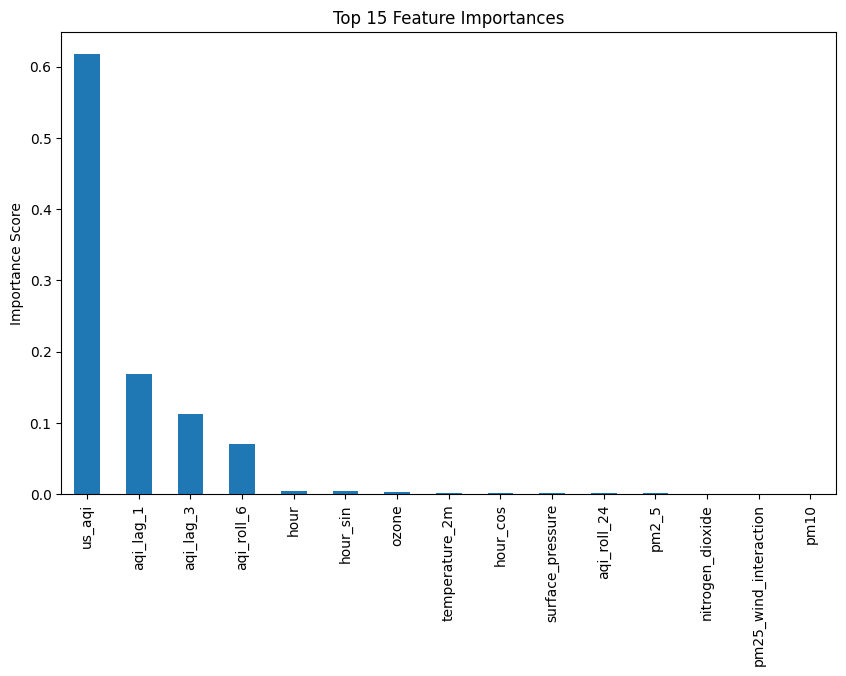

In [ ]:
plt.figure(figsize=(10,6))
feat_imp.head(15).plot(kind="bar")
plt.title("Top 15 Feature Importances")
plt.ylabel("Importance Score")
plt.show()


In [ ]:
df_features.columns

Index(['timestamp', 'pm10', 'pm2_5', 'carbon_monoxide', 'nitrogen_dioxide',
       'sulphur_dioxide', 'ozone', 'us_aqi', 'temperature_2m',
       'relative_humidity_2m', 'wind_speed_10m', 'surface_pressure',
       'target_aqi', 'hour', 'day_of_week', 'month', 'hour_sin', 'hour_cos',
       'aqi_lag_1', 'aqi_lag_3', 'aqi_lag_24', 'aqi_roll_6', 'aqi_roll_24',
       'pm25_wind_interaction'],
      dtype='object')

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Assuming 'df' is your DataFrame with the columns you listed
# ---------------------------------------------------------
# 1. CREATE TARGET (T+24)
# ---------------------------------------------------------
# We want to predict the US AQI 24 hours into the future
df = df_features

df['target_24h'] = df['us_aqi'].shift(-24)

# ---------------------------------------------------------
# 2. CREATE "FORECAST" FEATURES
# ---------------------------------------------------------
# In real life, for T+24, we would have a weather forecast.
# We simulate this by shifting the weather columns back by 24 hours.
weather_cols = ['temperature_2m', 'relative_humidity_2m', 'wind_speed_10m', 'pm25_wind_interaction']
for col in weather_cols:
    df[f'forecast_{col}_24h'] = df[col].shift(-24)

# ---------------------------------------------------------
# 3. SELECT FEATURES (The "Blindfold" Strategy)
# ---------------------------------------------------------
# Notice: We explicitly REMOVE 'aqi_lag_1', 'aqi_lag_3', 'aqi_roll_6'
features_long_term = [
    # A. Cyclical Time (Crucial for traffic/sunlight patterns)
    'hour_sin', 'hour_cos', 'day_of_week', 'month',
    
    # B. The "Baseline" (What happened yesterday?)
    'aqi_lag_24',      # AQI exactly 24 hours ago
    'aqi_roll_24',     # Trend over the last day
    # Note: You can also add 'pm2_5_lag_24' if you have it
    
    # C. The "Drivers" (What will the weather be?)
    'forecast_temperature_2m_24h', 
    'forecast_wind_speed_10m_24h',
    'forecast_relative_humidity_2m_24h',
    'forecast_pm25_wind_interaction_24h'
]

# Drop NaNs created by shifting
df_model = df.dropna()

X = df_model[features_long_term]
y = df_model['target_24h']

# ---------------------------------------------------------
# 4. TRAIN THE MODEL
# ---------------------------------------------------------
print(f"Training on features: {features_long_term}")
model_24h = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42)
model_24h.fit(X, y)

print("Long-term model trained! It now relies on Physics + History, not just the last hour.")

Training on features: ['hour_sin', 'hour_cos', 'day_of_week', 'month', 'aqi_lag_24', 'aqi_roll_24', 'forecast_temperature_2m_24h', 'forecast_wind_speed_10m_24h', 'forecast_relative_humidity_2m_24h', 'forecast_pm25_wind_interaction_24h']
Long-term model trained! It now relies on Physics + History, not just the last hour.


--- EVALUATION RESULTS (T+24 Hours) ---
Model MAE:    19.82 (Lower is better)
Baseline MAE: 18.47 (The score to beat)

❌ WARNING: Your model is worse than the baseline. It might need more data or better weather features.


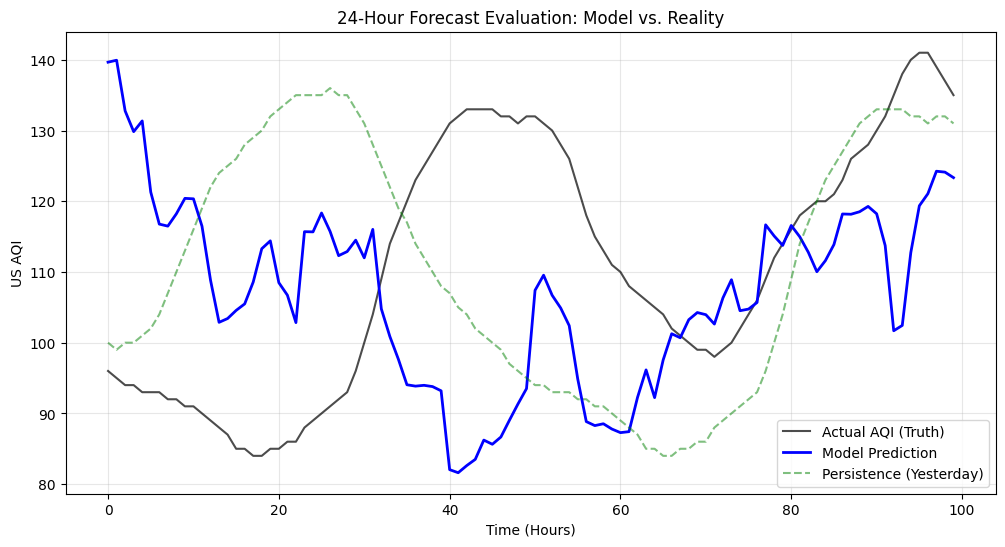

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# Assuming 'df_model' is your prepared dataframe with no NaNs
# and columns: ['target_24h', 'aqi_lag_24', 'forecast_wind...', etc.]

# ---------------------------------------------------------
# STEP 1: TIME-BASED SPLIT (No Random Shuffling!)
# ---------------------------------------------------------
# Let's use the last 20% of data for testing (Simulating the future)

df_model = df_features
test_size = int(len(df_model) * 0.2)

train_data = df_model.iloc[:-test_size] # The Past
test_data = df_model.iloc[-test_size:]  # The Future

# Define Features (NO short-term lags like aqi_lag_1)
features = [
    'hour_sin', 'hour_cos', 'day_of_week', 
    'aqi_lag_24', 'aqi_roll_24', 
    'forecast_temperature_2m_24h', 
    'forecast_wind_speed_10m_24h' 
    # Add other forecast/lag_24 columns here
]
target = 'target_24h'

X_train, y_train = train_data[features], train_data[target]
X_test, y_test = test_data[features], test_data[target]

# ---------------------------------------------------------
# STEP 2: TRAIN & PREDICT
# ---------------------------------------------------------
model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)

# Generate Predictions
predictions = model.predict(X_test)

# ---------------------------------------------------------
# STEP 3: CALCULATE METRICS VS. BASELINE
# ---------------------------------------------------------
# Metric 1: The Model's Error
mae_model = mean_absolute_error(y_test, predictions)
rmse_model = np.sqrt(mean_squared_error(y_test, predictions))

# Metric 2: The "Persistence Baseline" Error
# (What if we just guessed "Tomorrow will be exactly like Yesterday"?)
# We use 'aqi_lag_24' as the prediction for the baseline
mae_baseline = mean_absolute_error(y_test, X_test['aqi_lag_24'])

print("--- EVALUATION RESULTS (T+24 Hours) ---")
print(f"Model MAE:    {mae_model:.2f} (Lower is better)")
print(f"Baseline MAE: {mae_baseline:.2f} (The score to beat)")

if mae_model < mae_baseline:
    print("\n✅ SUCCESS: Your model is learning physics! It is better than just guessing 'same as yesterday'.")
else:
    print("\n❌ WARNING: Your model is worse than the baseline. It might need more data or better weather features.")

# ---------------------------------------------------------
# STEP 4: VISUALIZE THE REALITY
# ---------------------------------------------------------
# Plotting the last 100 hours of the test set to see the fit
plt.figure(figsize=(12, 6))
plt.plot(y_test.values[-100:], label='Actual AQI (Truth)', color='black', alpha=0.7)
plt.plot(predictions[-100:], label='Model Prediction', color='blue', linewidth=2)
plt.plot(X_test['aqi_lag_24'].values[-100:], label='Persistence (Yesterday)', color='green', linestyle='--', alpha=0.5)

plt.title("24-Hour Forecast Evaluation: Model vs. Reality")
plt.xlabel("Time (Hours)")
plt.ylabel("US AQI")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
from feature_engineering.feature_pipeline import build_features

df_features = build_features(df=df_clean)

Training Samples: 3436
Testing Samples:  859

--- Training Short-Term Model (T+1) ---
Short-Term MAE: 2.55 (Expected to be very low)

--- Training Long-Term Model (T+24) ---
Long-Term MAE:      15.22
Baseline (Persistence): 18.47
✅ SUCCESS: Your model beat the baseline by 17.6%!


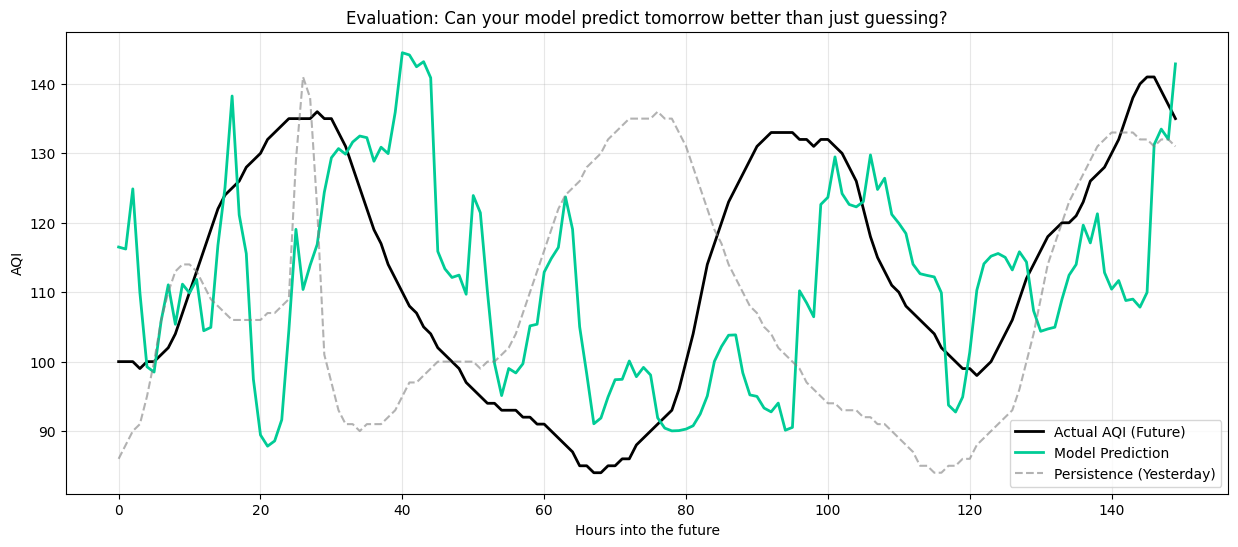

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# ==========================================
# 1. SETUP & DATA PREP
# ==========================================
# Assuming 'df' is your DataFrame with the exact columns you listed:
# Index: ['timestamp']
# Columns: ['pm10', 'pm2_5', ... 'aqi_lag_1', 'aqi_lag_24', ... 'pm25_wind_interaction']

# Sort by time to ensure order is correct
df = df_features.sort_values('timestamp')

# Create Targets
df['target_t1'] = df['us_aqi'].shift(-1)   # Next Hour Target
df['target_t24'] = df['us_aqi'].shift(-24) # Next Day Target

# Drop NaNs created by shifting and lags
df_clean = df.dropna()

# Split Data (Last 20% is for Testing)
test_size = int(len(df_clean) * 0.2)
train = df_clean.iloc[:-test_size]
test = df_clean.iloc[-test_size:]

print(f"Training Samples: {len(train)}")
print(f"Testing Samples:  {len(test)}")

# ==========================================
# 2. EVALUATION A: SHORT-TERM (Next Hour)
# ==========================================
# For next hour, we use ALL features including immediate history (lag_1)
features_short = [
    'pm10', 'pm2_5', 'nitrogen_dioxide', 'sulphur_dioxide', 'ozone', 
    'temperature_2m', 'relative_humidity_2m', 'wind_speed_10m', 
    'hour_sin', 'hour_cos', 'day_of_week', 'month',
    'aqi_lag_1', 'aqi_lag_3', 'aqi_lag_24', # Using all lags
    'aqi_roll_6', 'aqi_roll_24', 'pm25_wind_interaction'
]

print("\n--- Training Short-Term Model (T+1) ---")
model_t1 = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42)
model_t1.fit(train[features_short], train['target_t1'])

preds_t1 = model_t1.predict(test[features_short])
mae_t1 = mean_absolute_error(test['target_t1'], preds_t1)
print(f"Short-Term MAE: {mae_t1:.2f} (Expected to be very low)")

# ==========================================
# 3. EVALUATION B: LONG-TERM (Next Day)
# ==========================================
# CRITICAL: We DROP short-term lags (lag_1, lag_3, roll_6) 
# because we won't know them 24 hours in advance.
features_long = [
    'pm10', 'pm2_5', 'nitrogen_dioxide', 'sulphur_dioxide', 'ozone', 
    'temperature_2m', 'relative_humidity_2m', 'wind_speed_10m', 
    'hour_sin', 'hour_cos', 'day_of_week', 'month',
    'aqi_lag_24',  # KEEP: We know yesterday's value
    'aqi_roll_24', # KEEP: We know yesterday's trend
    'pm25_wind_interaction'
    # REMOVED: aqi_lag_1, aqi_lag_3, aqi_roll_6
]

print("\n--- Training Long-Term Model (T+24) ---")
model_t24 = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
model_t24.fit(train[features_long], train['target_t24'])

preds_t24 = model_t24.predict(test[features_long])

# ==========================================
# 4. THE "REALITY CHECK" (Baseline Comparison)
# ==========================================
# Calculate Errors
mae_t24 = mean_absolute_error(test['target_t24'], preds_t24)
rmse_t24 = np.sqrt(mean_squared_error(test['target_t24'], preds_t24))

# Baseline: "Naive Persistence" (Guessing tomorrow = yesterday)
# We use 'aqi_lag_24' as the prediction
mae_baseline = mean_absolute_error(test['target_t24'], test['aqi_lag_24'])

print(f"Long-Term MAE:      {mae_t24:.2f}")
print(f"Baseline (Persistence): {mae_baseline:.2f}")

if mae_t24 < mae_baseline:
    improvement = ((mae_baseline - mae_t24) / mae_baseline) * 100
    print(f"✅ SUCCESS: Your model beat the baseline by {improvement:.1f}%!")
else:
    print("❌ WARNING: Model is failing to beat simple persistence.")

# ==========================================
# 5. VISUALIZATION
# ==========================================
plt.figure(figsize=(15, 6))
# Plot only the last 150 hours for clarity
plt.plot(test['target_t24'].values[-150:], label='Actual AQI (Future)', color='black', linewidth=2)
plt.plot(preds_t24[-150:], label='Model Prediction', color='#00CC96', linewidth=2)
plt.plot(test['aqi_lag_24'].values[-150:], label='Persistence (Yesterday)', color='gray', linestyle='--', alpha=0.6)

plt.title("Evaluation: Can your model predict tomorrow better than just guessing?")
plt.xlabel("Hours into the future")
plt.ylabel("AQI")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()